# Modelos Ocultos de Markov

## ¿Qué es una cadena de Markov?

![](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*fUy1ALfvHXWzeyMzuapzWg.jpeg)
Fuente de la imagen: medium.com
![](https://www.statlect.com/images/MCMC-Markov-property.png)

## ¿Modelos Ocultos? (Arquitectura)

![](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*e0tiYtorXruLN3wmGaKHLw.png)
Fuente de la imagen: medium.com


![](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Jx_2VY8KNuRE9VP0ZT0T3A.png)
Fuente de la imagen: medium.com

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*E2rvoDrZ_QlZMWSDPHlMTQ.png)
Fuente de la imagen: medium.com

### Matrices de transición y emisión

Transición (probabilidad del estado j dado el estado i): $a_{ij} = P[X_{k=j} | X_{k-i}=i]$

$S_k^T = S_{k-1}^TA$

Emisión (probabilidad del observable j dado el estado i): $b_{ij} = P[Y_{k=j} | X_{k}=i]$

$O_k^T = S_{k}^TB$

![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*b4zFCJtl_8_EmwhpkaLVeg.png)

Ejemplo con letras tecleadas:

Transición:
- De la primera fila (estado inicial $\pi$), hay un 10,1% de posibilidades de ver una palabra que empiece por "c". 
- Todas las filas restantes forman la matriz de transición de estados. 
- Hay un 39,2% de posibilidades de que en una palabra, la 'd' vaya seguida de la 'e'.
![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*ejBf4GQ5_jaXmtXMrURYVQ.png)

Emisión:

- Hay un 5% de posibilidades de que al querer escribir "d" (estado) se obtenga "c" (observado).

![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*BoX6_Li3A4fX4DZyBISiwg.png)


## Tipos de problemas

1. Dado un conjunto de observaciones X y los 3 parámetros del modelo 𝝅, A y 𝜽, calcule la probabilidad de ocurrencia de las observaciones X. Para un conjunto dado de parámetros del modelo λ = (𝝅, A, 𝜽) y una secuencia de observaciones X, calcule P(X|λ). Este problema se resuelve utilizando el algoritmo forward.


2. Dado un conjunto de observaciones X y los 3 parámetros del modelo 𝝅, A y 𝜽, determine el conjunto óptimo de estados ocultos Z que dan como resultado X. Para un conjunto dado de parámetros del modelo λ = (𝝅, A, 𝜽) y una secuencia de observaciones X, calcule la estimación de probabilidad máxima a posteriori de la Z más probable. Este problema se resuelve utilizando el algoritmo de Viterbi.


3. Dado sólo un conjunto de observaciones X, determine el conjunto óptimo de parámetros del modelo 𝝅, A y 𝜽. Para una secuencia de observaciones X, adivine un conjunto inicial de parámetros del modelo λ = (𝝅, A, 𝜽) y utilice los algoritmos forward y Viterbi iterativamente para volver a calcular P(X|λ), así como para reajustar λ. Los cálculos se detienen cuando P(X|λ) deja de aumentar, o después de un número determinado de iteraciones. Este problema se resuelve mediante el algoritmo de Baum-Welch (expectación-maximización).


## Algoritmos

#### Expectación-maximización
Método iterativo para encontrar estimaciones (locales) de máxima verosimilitud o de máxima a posteriori (MAP) de parámetros en modelos estadísticos, en los que el modelo depende de variables latentes no observadas.

![](https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif)
Fuente: wikipedia.

### Forward

![](https://raw.githubusercontent.com/igomezv/RazonamientoProbabilistico/main/img/forwardalg.png)
Fuente: https://www.youtube.com/watch?v=M7afek1nEKM

### Backward
![](https://raw.githubusercontent.com/igomezv/RazonamientoProbabilistico/main/img/backwardakg.png)
Fuente: https://www.youtube.com/watch?v=jwYuki9GgJo


### Baum-Welch o Forward-backward (caso particular de expectación-maximización)

**Forward+Backward+Update**

Su objetivo es ajustar los parámetros del HMM, es decir, la matriz de transición de estados A, la matriz de emisión B y la distribución inicial de estados π₀, de forma que el modelo se parezca al máximo a los datos observados.

![](https://raw.githubusercontent.com/igomezv/RazonamientoProbabilistico/main/img/Baum-Welch1.png)
![](https://raw.githubusercontent.com/igomezv/RazonamientoProbabilistico/main/img/Baum-Welch2.png)


### Viterbi

El algoritmo de Viterbi es una forma eficaz de realizar una inferencia, o predicción, de los estados ocultos, una vez optimizados los parámetros del modelo y dados los datos observados.

![](https://upload.wikimedia.org/wikipedia/commons/7/73/Viterbi_animated_demo.gif?20120926150903)
Fuente: wikipedia

### Referencias:

- https://medium.com/@rmwkwok/hidden-markov-model-part-1-of-the-hmm-series-3f7fea28a08
- https://medium.com/@natsunoyuki/hidden-markov-models-with-python-c026f778dfa7
- https://www.geeksforgeeks.org/hidden-markov-model-in-machine-learning/

### Ejemplos.

Usaremos la libreria https://hmmlearn.readthedocs.io/en/latest/


### Ejemplos básicos

#### 1. Predicción de clima

In [2]:
# import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

In [3]:
# Define the state space
states = ["Sunny", "Rainy"]
n_states = len(states)
print('Number of hidden states :',n_states)
# Define the observation space
observations = ["Dry", "Wet"]
n_observations = len(observations)
print('Number of observations  :',n_observations)

Number of hidden states : 2
Number of observations  : 2


In [4]:
# Define the initial state distribution
state_probability = np.array([0.6, 0.4])
print("State probability: ", state_probability)
  
# Define the state transition probabilities
transition_probability = np.array([[0.7, 0.3],
                                   [0.3, 0.7]])
print("\nTransition probability:\n", transition_probability)
# Define the observation likelihoods
emission_probability= np.array([[0.9, 0.1],
                                 [0.2, 0.8]])
print("\nEmission probability:\n", emission_probability)

State probability:  [0.6 0.4]

Transition probability:
 [[0.7 0.3]
 [0.3 0.7]]

Emission probability:
 [[0.9 0.1]
 [0.2 0.8]]


In [6]:
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = state_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

In [7]:
# Define the sequence of observations
observations_sequence = np.array([0, 1, 0, 1, 0, 0]).reshape(-1, 1)
observations_sequence

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [8]:
# Predict the most likely sequence of hidden states
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)

Most likely hidden states: [0 1 1 1 0 0]


In [9]:
log_probability, hidden_states = model.decode(observations_sequence,
                                              lengths = len(observations_sequence),
                                              algorithm ='viterbi' )
  
print('Log Probability :',log_probability)
print("Most likely hidden states:", hidden_states)

Log Probability : -6.360602626270058
Most likely hidden states: [0 1 1 1 0 0]


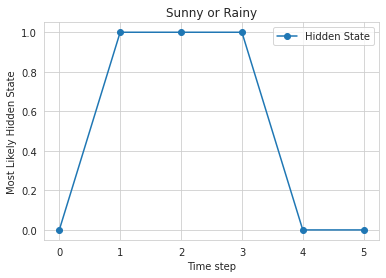

In [10]:
# Plot the results
sns.set_style("whitegrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel('Time step')
plt.ylabel('Most Likely Hidden State')
plt.title("Sunny or Rainy")
plt.legend()
plt.show()

### 2. Palabras

Most likely hidden states: [0 1 2 2 3 3 3 3]


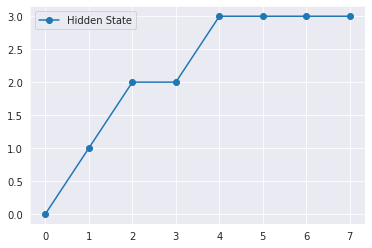

In [29]:
# Define the state space
states = ["Silence", "Word1", "Word2", "Word3"]
n_states = len(states)
  
# Define the observation space
observations = ["Loud", "Soft"]
n_observations = len(observations)
  
# Define the initial state distribution
start_probability = np.array([0.8, 0.1, 0.1, 0.0])
  
# Define the state transition probabilities
transition_probability = np.array([[0.7, 0.2, 0.1, 0.0],
                                    [0.0, 0.6, 0.4, 0.0],
                                    [0.0, 0.0, 0.6, 0.4],
                                    [0.0, 0.0, 0.0, 1.0]])
  
# Define the observation likelihoods
emission_probability = np.array([[0.7, 0.3],
                                  [0.4, 0.6],
                                  [0.6, 0.4],
                                  [0.3, 0.7]])
  
# Fit the model
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability
  
# Define the sequence of observations
observations_sequence = np.array([0, 1, 0, 0, 1, 1, 0, 1]).reshape(-1, 1)
  
# Predict the most likely hidden states
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)
  
# Plot the results
sns.set_style("darkgrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.legend()
plt.show()

### Letras

Most likely hidden states: [ 8  6 20  6 23 19  2 13 17  2 20]


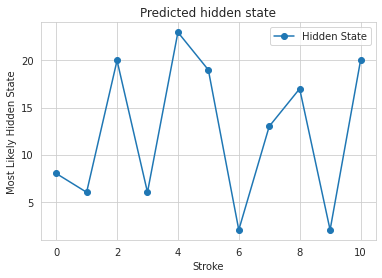

In [27]:

# Define the state space
states = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M",
          "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

n_states = len(states)
  
    
## Define the observation space
observations = ["up", "down", "left", "right", "up-right", "down-right",
                "down-left", "up-left"]
n_observations = len(observations)
   
# Define the initial state distribution
start_probability = np.random.dirichlet(np.ones(26),size=(1))[0]
  
# Define the state transition probabilities
transition_probability = np.random.dirichlet(np.ones(26),size=(26))
    
# Define the observation likelihoods
emission_probability = np.random.dirichlet(np.ones(26),size=(26))
  
# Fit the model
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability
  
# Define the sequence of observations
observations_sequence = np.array([0, 1, 2, 1, 0, 1, 2, 3, 2, 1, 2]).reshape(-1, 1)
  
# Predict the most likely hidden states
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)
  
# Plot the results
sns.set_style("whitegrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel('Stroke')
plt.ylabel('Most Likely Hidden State')
plt.title("Predicted hidden state")
plt.legend()
plt.show()

**Pregunta:** ¿Por qué en el último ejemplo el resultado cambia en cada ejecución?

**Pregunta:** ¿Qué algoritmos se están usando en los tres ejemplos anteriores?

## Otro ejemplo más realista: precios del oro.

In [54]:
# Descomentar para usar en Google Colab
# !pip install hmmlearn

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm

base_dir = "https://github.com/natsunoyuki/Data_Science/blob/master/gold/gold/gold_price_usd.csv?raw=True"

data = pd.read_csv(base_dir)

data.head()

,datetime,gold_price_usd
0,1978-12-29,137.06
1,1979-01-01,137.06
2,1979-01-02,137.29
3,1979-01-03,134.01
4,1979-01-04,136.79


In [32]:
# Convert the datetime from str to datetime object.
data["datetime"] = pd.to_datetime(data["datetime"])
data.head()

,datetime,gold_price_usd
0,1978-12-29,137.06
1,1979-01-01,137.06
2,1979-01-02,137.29
3,1979-01-03,134.01
4,1979-01-04,136.79


In [33]:
# Determine the daily change in gold price.
data["gold_price_change"] = data["gold_price_usd"].diff()
data.head()

,datetime,gold_price_usd,gold_price_change
0,1978-12-29,137.06,NaN
1,1979-01-01,137.06,0.00
2,1979-01-02,137.29,0.23
3,1979-01-03,134.01,-3.28
4,1979-01-04,136.79,2.78


In [34]:
# Restrict the data to later than 2008 Jan 01.
data = data[data["datetime"] >= pd.to_datetime("2008-01-01")]
data.head()

,datetime,gold_price_usd,gold_price_change
7567,2008-01-01,570.26,0.00
7568,2008-01-02,575.02,4.76
7569,2008-01-03,583.36,8.34
7570,2008-01-04,578.70,-4.66
7571,2008-01-07,583.83,5.13


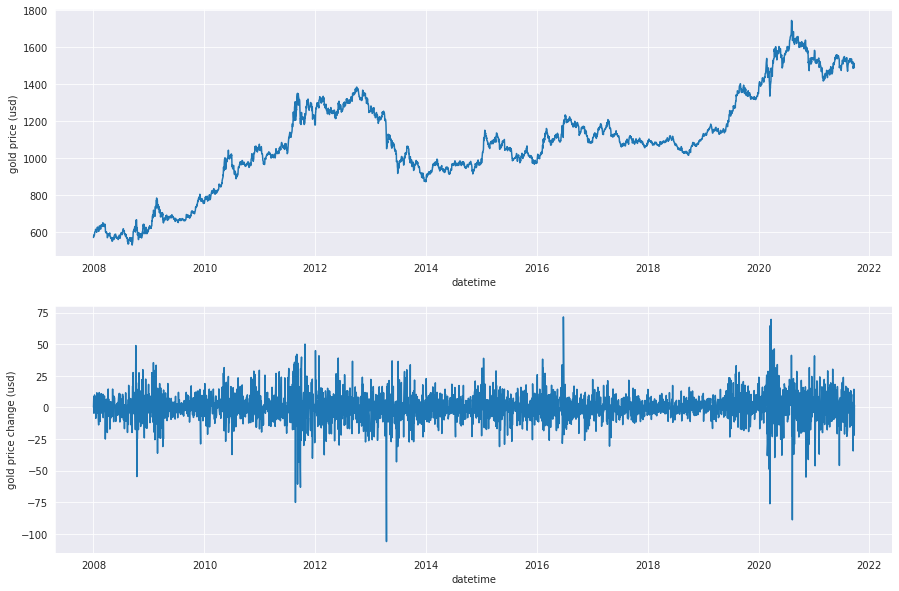

In [35]:
# Plot the daily gold prices as well as the daily change.
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(data["datetime"], data["gold_price_usd"])
plt.xlabel("datetime")
plt.ylabel("gold price (usd)")
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(data["datetime"], data["gold_price_change"])
plt.xlabel("datetime")
plt.ylabel("gold price change (usd)")
plt.grid(True)
plt.show()

En lugar de modelizar directamente el precio del oro, modelizamos su variación diaria, lo que nos permite captar mejor el estado del mercado. Ajustamos la variación diaria de los precios del oro a un modelo de emisiones gaussiano con 3 estados ocultos. La razón de utilizar 3 estados ocultos es que esperamos, como mínimo, 3 regímenes diferentes en las variaciones diarias: baja, media y alta volatilidad.

In [36]:
# Use the daily change in gold price as the observed measurements X.
X = data[["gold_price_change"]].values# Build the HMM model and fit to the gold price change data.
model = hmm.GaussianHMM(n_components = 3, covariance_type = "diag", n_iter = 50, random_state = 42)
model.fit(X)# Predict the hidden states corresponding to observed X with EM-algorithm

In [37]:
Z = model.predict(X)
Z

array([1, 0, 1, ..., 2, 2, 2])

In [38]:
states = pd.unique(Z)
states

array([1, 0, 2])

In [40]:
print("\nStart probabilities:")
print(model.startprob_)


Start probabilities:
[2.25217394e-05 9.99977478e-01 2.27517901e-54]


In [41]:
print("\nTransition matrix:")
print(model.transmat_)


Transition matrix:
[[1.18601839e-02 9.87982221e-01 1.57595016e-04]
 [7.39251441e-01 2.11663333e-01 4.90852259e-02]
 [6.21144512e-02 1.76534234e-02 9.20232125e-01]]


In [42]:
print("\nGaussian distribution means for the emission matrix:")
print(model.means_)


Gaussian distribution means for the emission matrix:
[[0.18754376]
 [0.28531535]
 [0.29985414]]


In [43]:
print("\nGaussian distribution covariances:")
print(model.covars_)


Gaussian distribution covariances:
[[[ 84.22877262]]

 [[ 29.75024959]]

 [[321.61159569]]]


Volatilidad del mercado modelada mediante un modelo de Markov oculto de emisiones gaussianas. Azul/estado 0 - volatilidad baja, naranja/estado 1- volatilidad media, verde/estado 2 - volatilidad alta.

[ True False  True ... False False False]
1315
1315
[False  True False ... False False False]
1249
1249
[False False False ...  True  True  True]
1020
1020


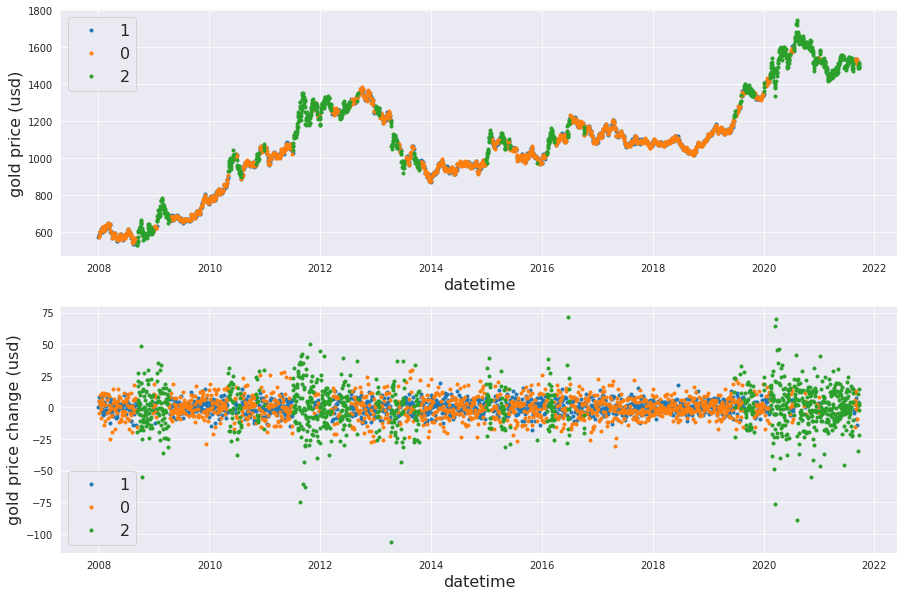

In [46]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
for i in states:
    want = (Z == i)
    print(want)
    x = data["datetime"].iloc[want]
    print(len(x))
    y = data["gold_price_usd"].iloc[want]
    print(len(y))
    plt.plot(x, y, '.') 
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("gold price (usd)", fontsize=16)

plt.subplot(2,1,2)
for i in states:
    want = (Z == i)
    x = data["datetime"].iloc[want]
    y = data["gold_price_change"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("gold price change (usd)", fontsize=16)
plt.show()

**Ejercicio.** Preguntas:
    
    - ¿En el el ejemplo anterior cuáles son los estados?
    - ¿Cuáles son los observables?
    - ¿En qué linea de código se entrena el modelo?
    - ¿Qué hizo el modelo oculto de Markov con los datos?

### Ejemplo. Evaluar modelos con criterios de información

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import check_random_state

from hmmlearn.hmm import GaussianHMM

rs = check_random_state(546)

In [50]:
model = GaussianHMM(4, init_params="")
model.n_features = 4
model.startprob_ = np.array([1/4., 1/4., 1/4., 1/4.])
model.transmat_ = np.array([[0.3, 0.4, 0.2, 0.1],
                            [0.1, 0.2, 0.3, 0.4],
                            [0.5, 0.2, 0.1, 0.2],
                            [0.25, 0.25, 0.25, 0.25]])
model.means_ = np.array([[-2.5], [0], [2.5], [5.]])
model.covars_ = np.sqrt([[0.25], [0.25], [0.25], [0.25]])

X, _ = model.sample(1000, random_state=rs)
lengths = [X.shape[0]]


In [51]:
model = GaussianHMM(4, init_params="")
model.n_features = 4
model.startprob_ = np.array([1/4., 1/4., 1/4., 1/4.])
model.transmat_ = np.array([[0.3, 0.4, 0.2, 0.1],
                            [0.1, 0.2, 0.3, 0.4],
                            [0.5, 0.2, 0.1, 0.2],
                            [0.25, 0.25, 0.25, 0.25]])
model.means_ = np.array([[-2.5], [0], [2.5], [5.]])
model.covars_ = np.sqrt([[0.25], [0.25], [0.25], [0.25]])

X, _ = model.sample(1000, random_state=rs)
lengths = [X.shape[0]]

In [52]:
aic = []
bic = []
lls = []
ns = [2, 3, 4, 5, 6]
for n in ns:
    best_ll = None
    best_model = None
    for i in range(10):
        h = GaussianHMM(n, n_iter=200, tol=1e-4, random_state=rs)
        h.fit(X)
        score = h.score(X)
        if not best_ll or best_ll < best_ll:
            best_ll = score
            best_model = h
    aic.append(best_model.aic(X))
    bic.append(best_model.bic(X))
    lls.append(best_model.score(X))

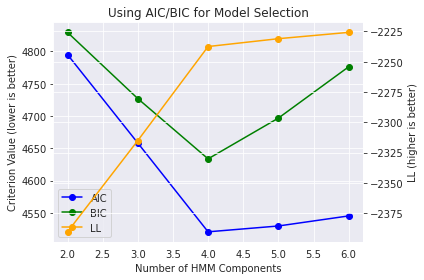

In [53]:
fig, ax = plt.subplots()
ln1 = ax.plot(ns, aic, label="AIC", color="blue", marker="o")
ln2 = ax.plot(ns, bic, label="BIC", color="green", marker="o")
ax2 = ax.twinx()
ln3 = ax2.plot(ns, lls, label="LL", color="orange", marker="o")

ax.legend(handles=ax.lines + ax2.lines)
ax.set_title("Using AIC/BIC for Model Selection")
ax.set_ylabel("Criterion Value (lower is better)")
ax2.set_ylabel("LL (higher is better)")
ax.set_xlabel("Number of HMM Components")
fig.tight_layout()

plt.show()


### Practica: en parejas (o equipos) buscar un conjunto de datos en internet, entrenar un modelo oculto de Markov con él, identificar probabilidades iniciales, estados, observables y matriz de transición. De igual manera, explicar brevemente qué modela el modelo oculto de Markov con los datos usados.

Sugerencia: Se pueden utilizar los datos usados en esta notebook; pero con algunos cambios, ya sea en las suposiones iniciales, o bien, en los estados o en los observables. En la documentación de hmmlearn, se encuentran otros datos/ejemplos que se pueden explorar: https://hmmlearn.readthedocs.io/en/0.2.0/auto_examples/plot_hmm_stock_analysis.html 